<a href="https://colab.research.google.com/github/josephasal/cosmo_inference/blob/adaptive_cov/mcmc/run_mcmc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install corner
!pip install emcee

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 1.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import emcee

#Running all the other notebooks to load them in
%run '/content/drive/MyDrive/Colab Notebooks/Bayesian Stats in Cosmology/Actual project code/mcmc_algorithm.ipynb'
%run '/content/drive/MyDrive/Colab Notebooks/Bayesian Stats in Cosmology/Actual project code/adaptive_sampling_mcmc.ipynb'
%run '/content/drive/MyDrive/Colab Notebooks/Bayesian Stats in Cosmology/Actual project code/convergence_diagnostics.ipynb'

#loading in the data from google drive, cleaning and assigning variables
filepath = '/content/drive/MyDrive/Colab Notebooks/Bayesian Stats in Cosmology/Actual project code/LOWZ+ESSENCE+SNLS.csv'
supernova_df = pd.read_csv(filepath)

#defining variables
redshift = supernova_df['Z']
distance_mod = supernova_df['MU']
err_distance_mod = supernova_df['MUERR']

supernova_df.head()

,CID,Z,c,cerr,x1,x1err,x0,x0err,mb,mberr,MU,MUERR,covx0x1,covx0c,covx1c
0,90O,0.0306,-0.0615,0.0324,0.3063,0.3943,0.005963,0.000209,16.210047,0.038083,35.547001,0.106,0.000010,-0.000005,-0.003592
1,93B,0.0707,0.0594,0.0376,-0.6927,0.3300,0.000736,0.000035,18.469965,0.051633,37.396999,0.120,0.000001,-0.000001,-0.001280
2,92P,0.0263,-0.0777,0.0287,0.1607,0.4422,0.006898,0.000143,16.053383,0.022515,35.415001,0.097,-0.000016,-0.000003,-0.001496
3,93H,0.0248,0.1963,0.0412,-2.8668,0.2425,0.003563,0.000169,16.743837,0.051566,35.095001,0.139,0.000007,-0.000006,-0.002212
4,93O,0.0519,-0.0666,0.0271,-0.9641,0.2376,0.001618,0.000035,17.626810,0.023160,36.840000,0.086,-0.000004,-0.000001,0.000531


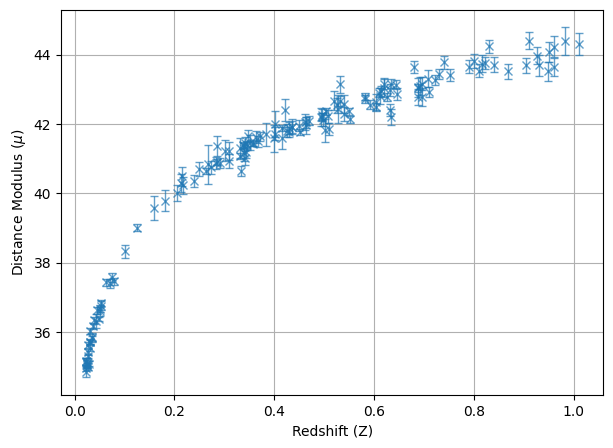

In [ ]:
#quick plots of redshift against distance mod and error
plt.figure(figsize = (7,5))
plt.errorbar(redshift,distance_mod,err_distance_mod, linestyle = 'None', marker = 'x', elinewidth=1, capsize=3, capthick=1, alpha=0.7)
plt.xlabel('Redshift (Z)')
plt.ylabel('Distance Modulus $(\mu)$')
plt.grid()
plt.show()

In [ ]:
#Trace plot of the walkers
#Trying with one first
#samples gives an array
walker_1 = samples[:,0,:]
walker_1_h = walker_1[:,0] #every value of walker 1 across each iteraiton for the h
iterations = np.arange(samples.shape[0])


plt.figure(figsize = (10,6))
plt.plot(iterations, walker_1[:,0])
plt.title('walker 1 parameter space through iterations')

#once MCMC finalised try to get a trace of all the walkers for each paramater using a for loop and put on the same graph


In [44]:
#For each MCMC algorithm use 10,000 iterations, 10 walkers, 20% burn in, and step size 0.005

#Starting for the basic mcmc algortihm as a baseline
np.random.seed(69)
num_walkers = 10

#10 initial guesses in the ranges of 0.2<omega_m<0.4 and 0.6<h<0.8
initial_guess = [[np.random.uniform(0.2,0.4), np.random.uniform(0.6,0.8)]
                for _ in range(num_walkers)]

n_steps = 10000
step_size = [0.01,0.01]

#Basic MCMC algorithm with 10k iterations, 0.005 step size 20% burn in and 10 walkers
%time basicmc_samples = metropolis_hastings(log_likelihood, redshift, distance_mod, err_distance_mod, n_steps, initial_guess, step_size, 0.2, 10)



MCMC carried out with 10000 steps, and acceptance ratio of each walker [0.2379 0.2338 0.2381 0.2338 0.2424 0.2344 0.2383 0.2442 0.2373 0.2376]
CPU times: user 6min 6s, sys: 2.42 s, total: 6min 8s
Wall time: 6min 12s


In [46]:
#GR diagnostic and ess

#get omega m and h as 2d arrays
omega_basic_samples = basicmc_samples[:,:,0]
h_basic_samples = basicmc_samples[:,:,1]

print(f'Gelman Rubin Diagnostic for Omega_m: {gelman_rubin(omega_basic_samples)}')
print(f'Gelman Rubin Diagnostic for h: {gelman_rubin(h_basic_samples)}')


#Effective sample size
print(f'Effective sample size for Omega m: {eff_sample_size(omega_basic_samples)}')
print(f'Effective sample size for h: {eff_sample_size(h_basic_samples)}')


Gelman Rubin Diagnostic for Omega_m: 1.00511816329354
Gelman Rubin Diagnostic for h: 1.002347994178281
Effective sample size for Omega m: 45.516685074574625
Effective sample size for h: 94.86865562327846


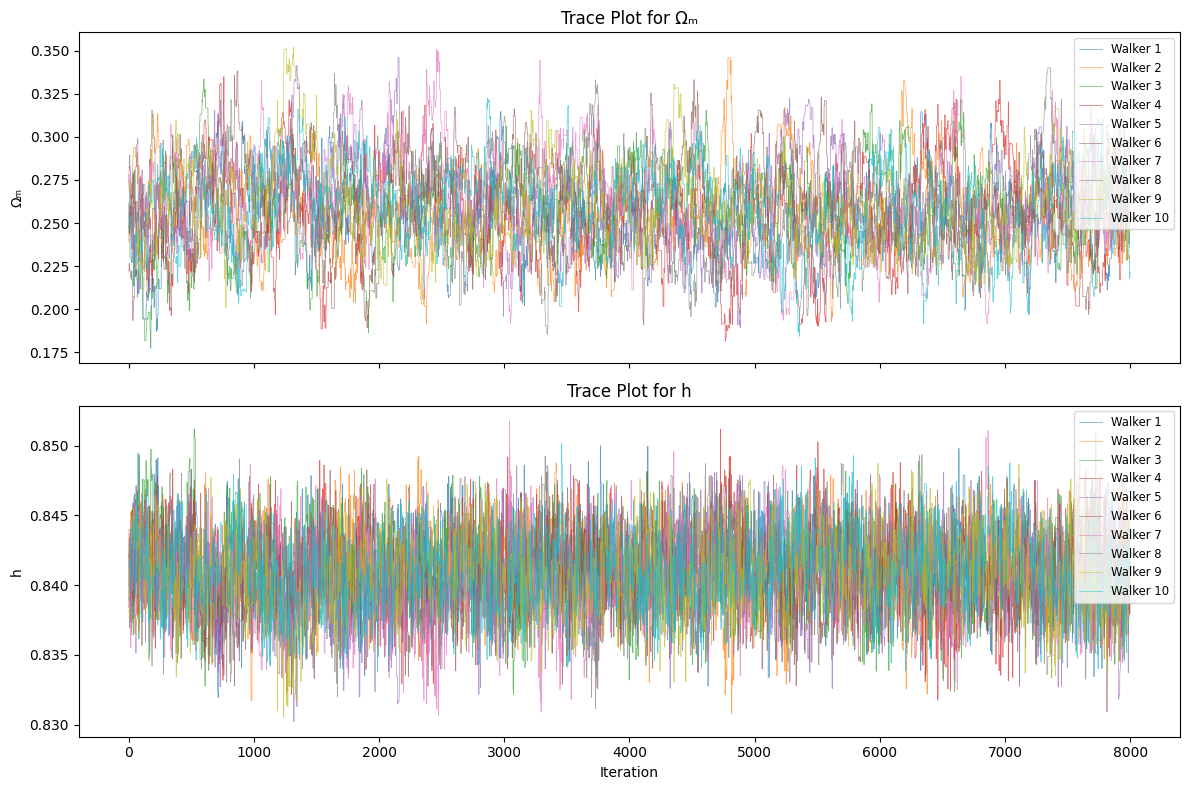

In [52]:
#Trace plot of each walker
# Assuming samples has shape (steps_after_burn, num_walkers, 2)
n_steps_post, num_walkers, n_params = basicmc_samples.shape
iterations = np.arange(n_steps_post)

# Create separate plots for each parameter:
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Trace plot for omega_m (parameter index 0)
for walker in range(num_walkers):
    axes[0].plot(iterations, basicmc_samples[:, walker, 0], label=f"Walker {walker+1}", alpha = 0.7, linewidth = 0.5)
axes[0].set_title("Trace Plot for Ωₘ")
axes[0].set_ylabel("Ωₘ")
axes[0].legend(loc="upper right", fontsize='small')

# Trace plot for h (parameter index 1)
for walker in range(num_walkers):
    axes[1].plot(iterations, basicmc_samples[:, walker, 1], label=f"Walker {walker+1}", alpha = 0.7, linewidth = 0.5)
axes[1].set_title("Trace Plot for h")
axes[1].set_xlabel("Iteration")
axes[1].set_ylabel("h")
axes[1].legend(loc="upper right", fontsize='small')

plt.tight_layout()
plt.show()

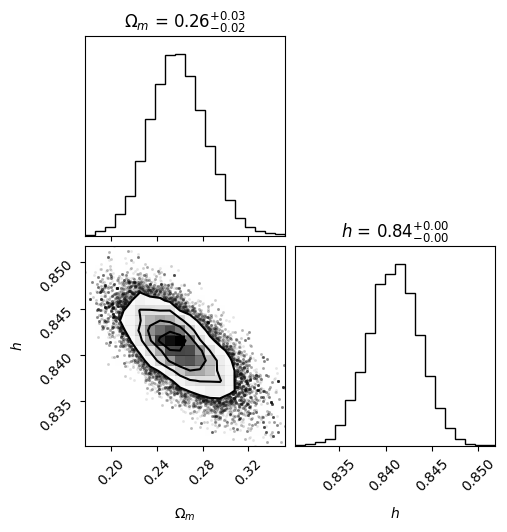

In [53]:
import corner
import matplotlib.pyplot as plt

# Flatten the chain: resulting shape will be (steps_after_burn * n_walkers, 2)
all_samples = basicmc_samples.reshape(-1, basicmc_samples.shape[-1])

# Create the corner plot with appropriate labels
figure = corner.corner(all_samples, labels=["$\Omega_m$", "$h$"],
                         show_titles=True, title_kwargs={"fontsize": 12})
plt.show()


In [55]:
#Now running the adaptive mcmc with the same inital guesses and stuff as the basic one:
%time adaptive_samples = adaptive_metropolis_hastings(log_likelihood, redshift, distance_mod, err_distance_mod, n_steps, initial_guess, step_size, 0.2, 10)

After 100 iteration alpha = 0.34299999999999997, new step size = [0.01009343379371769, 0.01009343379371769]
After 200 iteration alpha = 0.244, new step size = [0.010087379549896233, 0.010087379549896233]
After 300 iteration alpha = 0.23800000000000002, new step size = [0.01007528195444534, 0.01007528195444534]
After 400 iteration alpha = 0.243, new step size = [0.010068231724945437, 0.010068231724945437]
After 500 iteration alpha = 0.251, new step size = [0.010069238598460768, 0.010069238598460768]
After 600 iteration alpha = 0.235, new step size = [0.010054146062794677, 0.010054146062794677]
After 700 iteration alpha = 0.221, new step size = [0.010025031276057951, 0.010025031276057951]
After 800 iteration alpha = 0.244, new step size = [0.0100190180614371, 0.0100190180614371]
After 900 iteration alpha = 0.23800000000000002, new step size = [0.010007002450571768, 0.010007002450571768]
After 1000 iteration alpha = 0.228, new step size = [0.00998501124437711, 0.00998501124437711]
After 1

In [57]:
#GR diagnostic and ess

#get omega m and h as 2d arrays
omega_adaptive_samples = adaptive_samples[:,:,0]
h_adaptive_samples = adaptive_samples[:,:,1]

print(f'Gelman Rubin Diagnostic for Omega_m: {gelman_rubin(omega_adaptive_samples)}')
print(f'Gelman Rubin Diagnostic for h: {gelman_rubin(h_adaptive_samples)}')


#Effective sample size
print(f'Effective sample size for Omega m: {eff_sample_size(omega_adaptive_samples)}')
print(f'Effective sample size for h: {eff_sample_size(h_basicmc_samples)}')

Gelman Rubin Diagnostic for Omega_m: 1.00518977723924
Gelman Rubin Diagnostic for h: 1.0020805924466323
Effective sample size for Omega m: 76.7497468081089
Effective sample size for h: 72.63876298000989


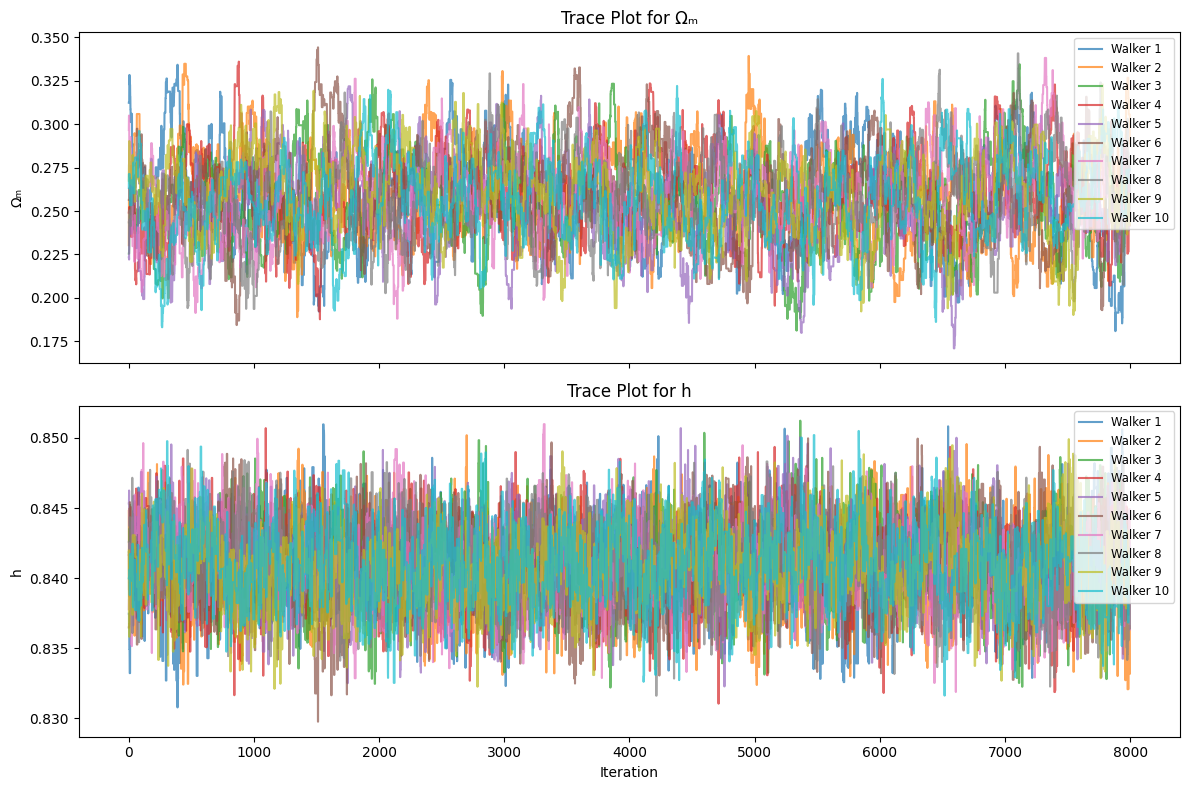

In [58]:
#Trace plot of each walker
# Assuming samples has shape (steps_after_burn, num_walkers, 2)
n_steps_post, num_walkers, n_params = adaptive_samples.shape
iterations = np.arange(n_steps_post)

# Create separate plots for each parameter:
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Trace plot for omega_m (parameter index 0)
for walker in range(num_walkers):
    axes[0].plot(iterations, adaptive_samples[:, walker, 0], label=f"Walker {walker+1}", alpha = 0.7)
axes[0].set_title("Trace Plot for Ωₘ")
axes[0].set_ylabel("Ωₘ")
axes[0].legend(loc="upper right", fontsize='small')

# Trace plot for h (parameter index 1)
for walker in range(num_walkers):
    axes[1].plot(iterations, adaptive_samples[:, walker, 1], label=f"Walker {walker+1}", alpha = 0.7)
axes[1].set_title("Trace Plot for h")
axes[1].set_xlabel("Iteration")
axes[1].set_ylabel("h")
axes[1].legend(loc="upper right", fontsize='small')

plt.tight_layout()
plt.show()

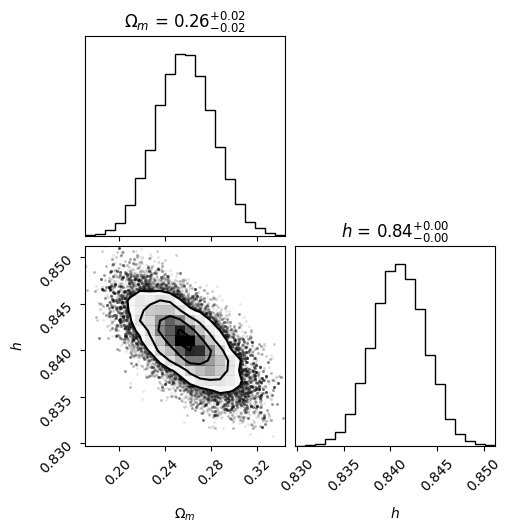

In [59]:
#Corner plot of adaptive mc
all_samples = adaptive_samples.reshape(-1, adaptive_samples.shape[-1])

# Create the corner plot with appropriate labels
figure = corner.corner(all_samples, labels=["$\Omega_m$", "$h$"],
                         show_titles=True, title_kwargs={"fontsize": 12})
plt.show()
